# Análisis Exploratorio – Predicción de Vida Útil Restante (RUL) en motores turbofan (FD001)

Este notebook forma parte del proyecto de **mantenimiento predictivo** para una aerolínea / empresa de manufactura.
El objetivo es entender el comportamiento de los motores turbofan simulados (dataset NASA CMAPSS – subset FD001) y
preparar el terreno para construir un modelo que estime la **Vida Útil Restante (RUL)** de cada motor.

**Preguntas de negocio:**

- ¿Cómo se comportan los motores a lo largo de su ciclo de vida?
- ¿Qué sensores muestran señales claras de degradación a medida que se acerca la falla?
- ¿Existen patrones diferenciados entre motores (unidades) o todos siguen comportamientos similares?
- ¿Qué variables parecen más relevantes para explicar la RUL?

En este notebook nos centraremos en:

1. Carga de datos y estructura básica.
2. Distribución de RUL y ciclos de vida de los motores.
3. Análisis exploratorio de sensores y condiciones operacionales.
4. Identificación preliminar de sensores potencialmente críticos.

In [1]:
# Configuración general para el notebook de EDA

import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos consistente
sns.set(style="whitegrid", context="talk")

# ==== Manejo de rutas ====
# Si ejecutamos desde notebooks/, la raíz del proyecto es el padre de esta carpeta.
# Usamos cwd como referencia, que en VS Code/Jupyter suele ser la carpeta del notebook.
CURRENT_DIR = Path.cwd()

# Si estamos dentro de notebooks/, subimos un nivel; si no, asumimos que ya estamos en la raíz
if CURRENT_DIR.name == "notebooks":
    PROJECT_ROOT = CURRENT_DIR.parent
else:
    PROJECT_ROOT = CURRENT_DIR

os.chdir(PROJECT_ROOT)

print("Directorio de trabajo actual:", Path.cwd())

# Importamos nuestras utilidades internas desde src/
from src.data_loading import load_fd001_prepared

Directorio de trabajo actual: /media/franklin/Respaldo 2/Proyectos portafolio/Proyecto 1


In [2]:
train_df, test_df = load_fd001_prepared(save_processed=True)

print("Forma del set de entrenamiento:", train_df.shape)
print("Forma del set de test:", test_df.shape)

train_df.head()

Forma del set de entrenamiento: (20631, 32)
Forma del set de test: (13096, 33)


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,187


In [3]:
3  # Carga de datos FD001 con la función utilitaria

train_df, test_df = load_fd001_prepared(save_processed=True)

print("Forma del set de entrenamiento:", train_df.shape)
print("Forma del set de test:", test_df.shape)

train_df.head()

Forma del set de entrenamiento: (20631, 32)
Forma del set de test: (13096, 33)


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,187


In [4]:
4  # Descripción general de las columnas y tipos de datos

print("Columnas del dataset de entrenamiento:")
print(train_df.columns.tolist())

print("\nInformación general del DataFrame de entrenamiento:")
train_df.info()

Columnas del dataset de entrenamiento:
['unit_id', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'RUL']

Información general del DataFrame de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 

In [5]:
5  # Estadísticos descriptivos de variables numéricas

train_df.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
unit_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.00,77.0000,100.0000
time_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.00,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.00,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.00,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.00,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.67,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.64,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.10,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.04,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.62,14.6200,14.6200


In [6]:
# Información básica sin bloqueos

print("Columnas:", train_df.columns.tolist())
print("Tipos de datos:")
print(train_df.dtypes)
print("\nForma:", train_df.shape)
print("\nMemoria usada:", train_df.memory_usage(deep=True).sum() / 1024**2, "MB")

Columnas: ['unit_id', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'RUL']
Tipos de datos:
unit_id           int64
time_cycles       int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17         int64
sensor_18         int64
sensor_19  

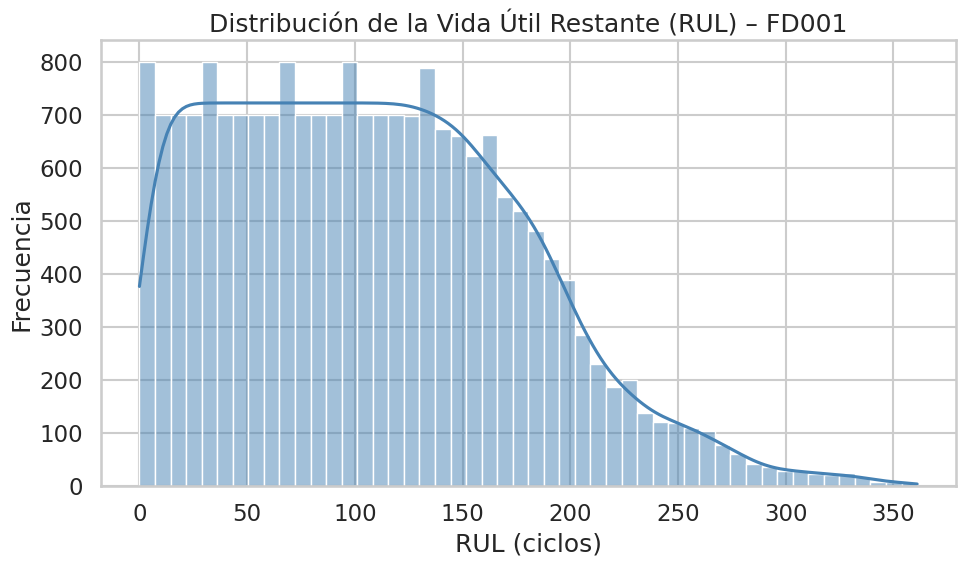

In [7]:
# Distribución de la RUL en el set de entrenamiento

plt.figure(figsize=(10, 6))
sns.histplot(train_df["RUL"], bins=50, kde=True, color="steelblue")
plt.title("Distribución de la Vida Útil Restante (RUL) – FD001")
plt.xlabel("RUL (ciclos)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Número de motores en entrenamiento: 100

Estadísticos de longitud de ciclos por motor:
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_cycles, dtype: float64


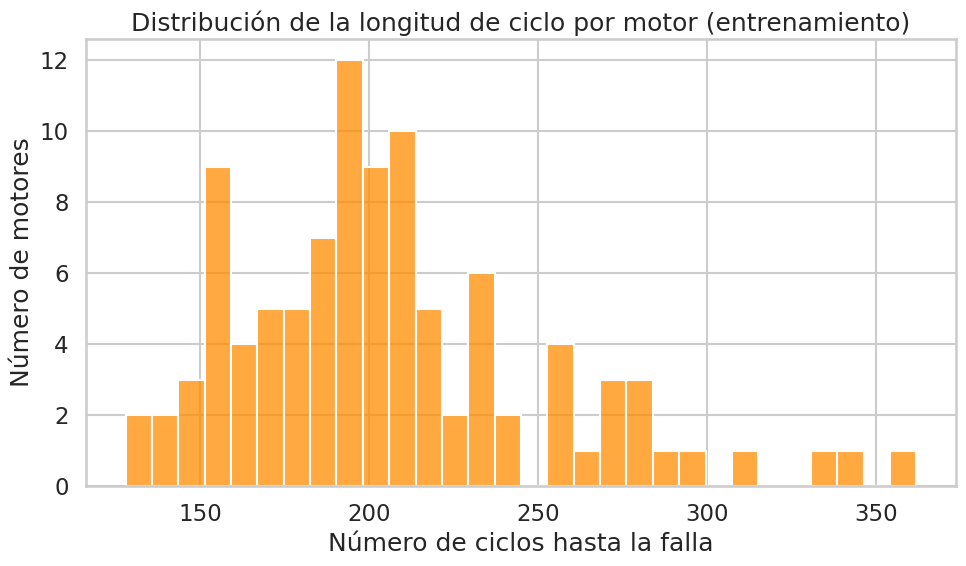

In [11]:
# 6 Número de motores únicos (unidades)
n_units_train = train_df["unit_id"].nunique()
print(f"Número de motores en entrenamiento: {n_units_train}")

# Longitud (número de ciclos) por motor
cycles_per_unit = train_df.groupby("unit_id")["time_cycles"].max()

print("\nEstadísticos de longitud de ciclos por motor:")
print(cycles_per_unit.describe())

plt.figure(figsize=(10, 6))
sns.histplot(cycles_per_unit, bins=30, kde=False, color="darkorange")
plt.title("Distribución de la longitud de ciclo por motor (entrenamiento)")
plt.xlabel("Número de ciclos hasta la falla")
plt.ylabel("Número de motores")
plt.tight_layout()
plt.show()

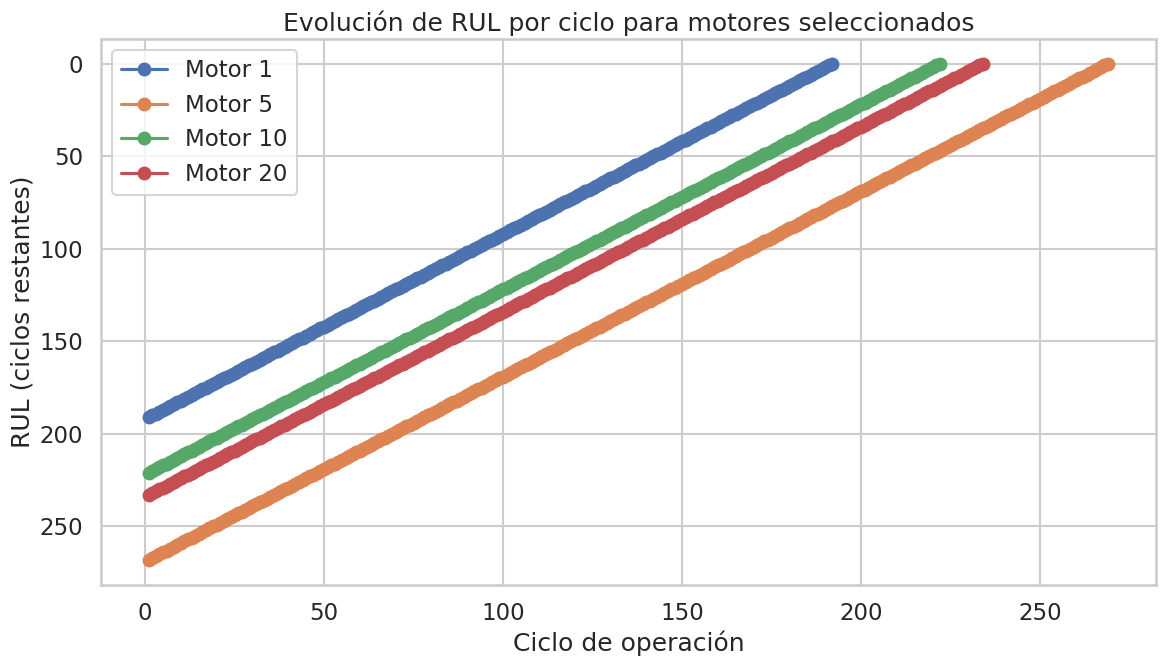

In [12]:
# 7 Visualización de la trayectoria de RUL para algunos motores seleccionados

sample_units = [1, 5, 10, 20]  # podemos cambiar estos IDs si queremos otros ejemplos

plt.figure(figsize=(12, 7))

for unit_id in sample_units:
    subset = train_df[train_df["unit_id"] == unit_id]
    plt.plot(
        subset["time_cycles"],
        subset["RUL"],
        marker="o",
        linestyle="-",
        label=f"Motor {unit_id}",
    )

plt.gca().invert_yaxis()  # Opcional: invertir eje Y para que RUL decrezca "hacia abajo"
plt.title("Evolución de RUL por ciclo para motores seleccionados")
plt.xlabel("Ciclo de operación")
plt.ylabel("RUL (ciclos restantes)")
plt.legend()
plt.tight_layout()
plt.show()

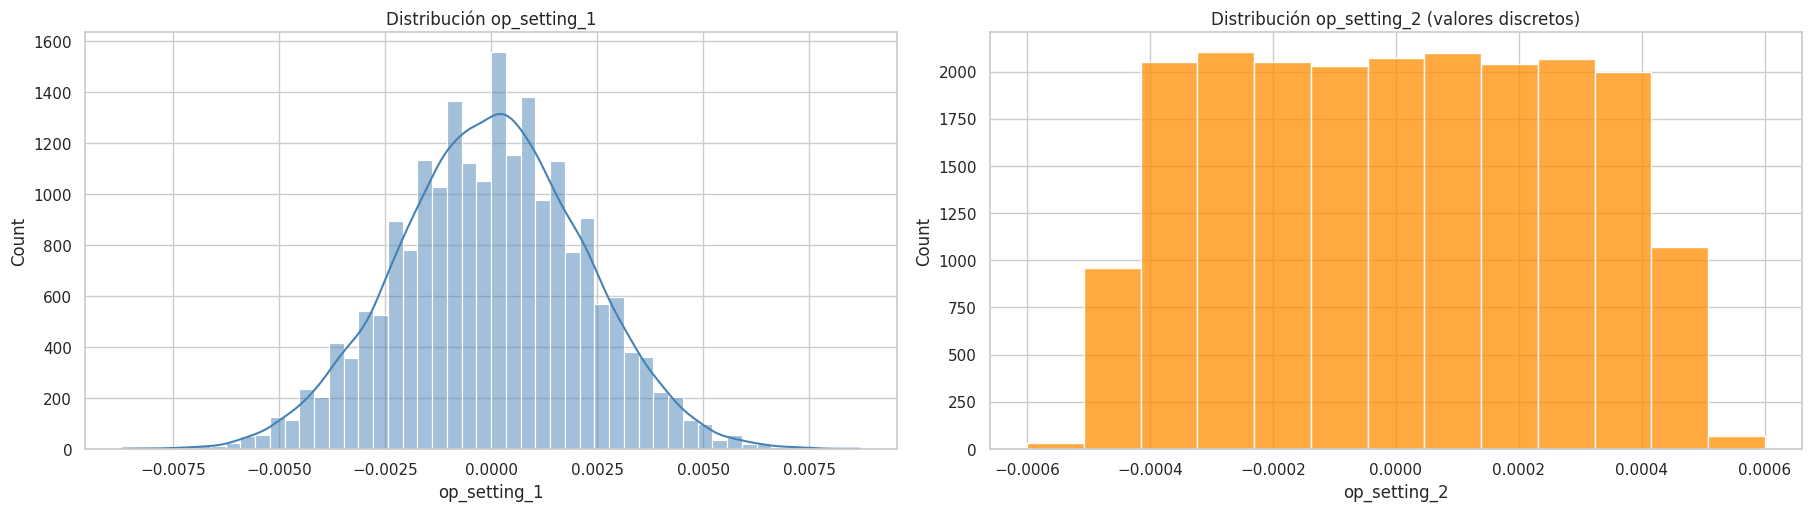

op_setting_3
100.0    20631
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

op_cols = [col for col in train_df.columns if col.startswith("op_setting_")]

fig, axes = plt.subplots(1, 2, figsize=(18, 5), constrained_layout=True)

# --- op_setting_1: continua ---
sns.histplot(train_df["op_setting_1"], bins=50, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Distribución op_setting_1")
axes[0].set_xlabel("op_setting_1")

# --- op_setting_2: discreta ---
sns.histplot(
    train_df["op_setting_2"],
    bins=len(train_df["op_setting_2"].unique()),
    kde=False,
    ax=axes[1],
    color="darkorange",
)
axes[1].set_title("Distribución op_setting_2 (valores discretos)")
axes[1].set_xlabel("op_setting_2")

plt.show()

train_df["op_setting_3"].describe()
print(train_df["op_setting_3"].value_counts())

Sensores con datos: 15
Sensores: ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']


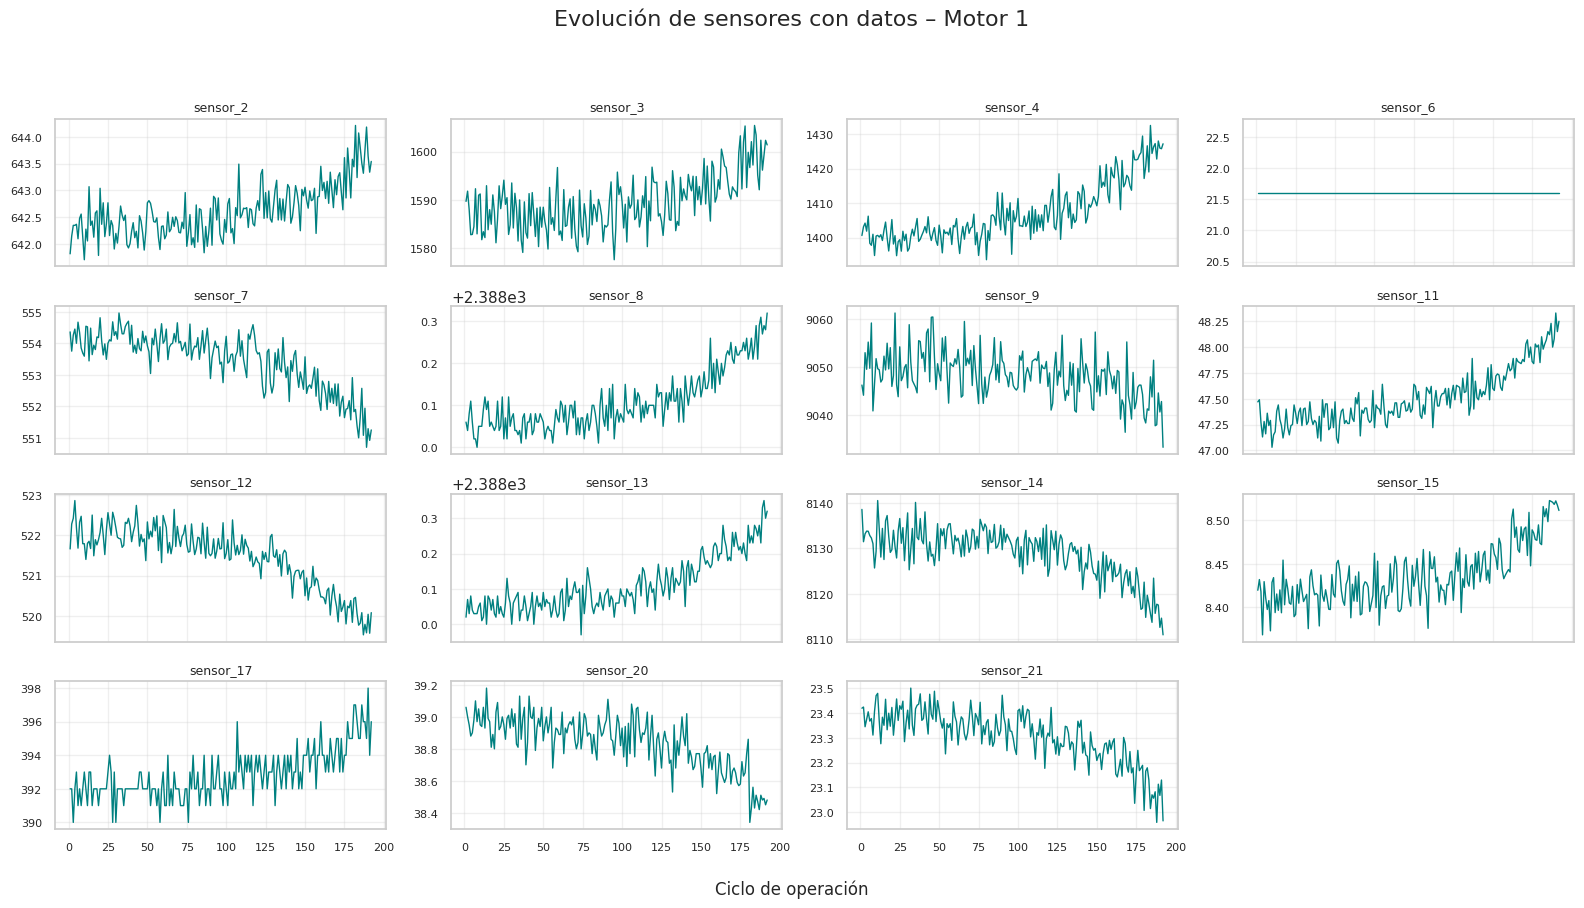

In [27]:
# 9 Visualización de sensores con datos para un motor concreto en una grilla compacta

# Seleccionamos solo sensores que tienen datos (no constantes o no nulos)
sensor_cols = [col for col in train_df.columns if col.startswith("sensor_")]
sensor_cols = [
    col
    for col in sensor_cols
    if train_df[col].nunique() > 1 and not train_df[col].isnull().all()
]

print(f"Sensores con datos: {len(sensor_cols)}")
print("Sensores:", sensor_cols)

example_unit = 1
unit_data = train_df[train_df["unit_id"] == example_unit]

n_sensors = len(sensor_cols)
n_cols = 4
n_rows = int(np.ceil(n_sensors / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 2.2 * n_rows), sharex=True)
axes = axes.flatten()

for i, sensor in enumerate(sensor_cols):
    ax = axes[i]
    ax.plot(
        unit_data["time_cycles"],
        unit_data[sensor],
        label=sensor,
        color="teal",
        linewidth=1,
    )
    ax.set_ylabel("")
    ax.set_title(sensor, fontsize=9)
    ax.tick_params(axis="both", labelsize=8)
    ax.grid(True, alpha=0.3)

# Eliminar ejes vacíos si hay menos sensores que subplots
for j in range(n_sensors, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    f"Evolución de sensores con datos – Motor {example_unit}", y=1.02, fontsize=16
)
fig.supxlabel("Ciclo de operación", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Top 10 sensores por correlación (en valor absoluto) con RUL:

sensor_11   -0.696228
sensor_4    -0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15   -0.642667
sensor_21    0.635662
sensor_20    0.629428
sensor_2    -0.606484
sensor_17   -0.606154
sensor_3    -0.584520
Name: RUL, dtype: float64


/tmp/ipykernel_9667/1071503387.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


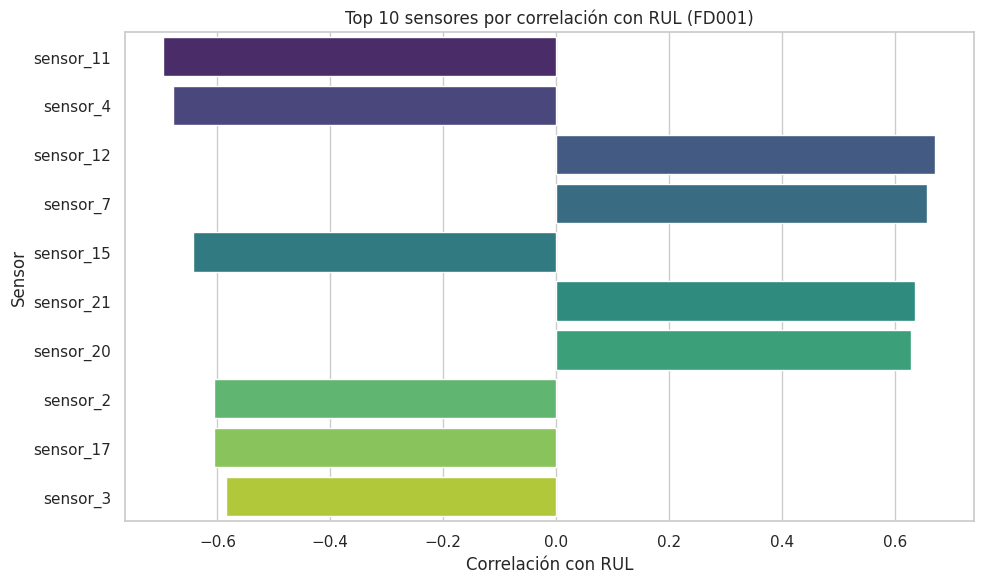

In [29]:
# 10 Cálculo de correlación de Pearson entre sensores y RUL

corr_with_rul = train_df[sensor_cols + ["RUL"]].corr()["RUL"].drop("RUL").sort_values()

# Mostramos los sensores con mayor |correlación| con RUL
corr_abs_sorted = corr_with_rul.abs().sort_values(ascending=False)

top_n = 10
print(f"Top {top_n} sensores por correlación (en valor absoluto) con RUL:\n")
print(corr_with_rul.loc[corr_abs_sorted.index[:top_n]])

# Visualizamos las correlaciones principales

plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_rul.loc[corr_abs_sorted.index[:top_n]],
    y=corr_abs_sorted.index[:top_n],
    palette="viridis",
)
plt.title(f"Top {top_n} sensores por correlación con RUL (FD001)")
plt.xlabel("Correlación con RUL")
plt.ylabel("Sensor")
plt.tight_layout()
plt.show()

Sensor con mayor correlación absoluta con RUL: sensor_11


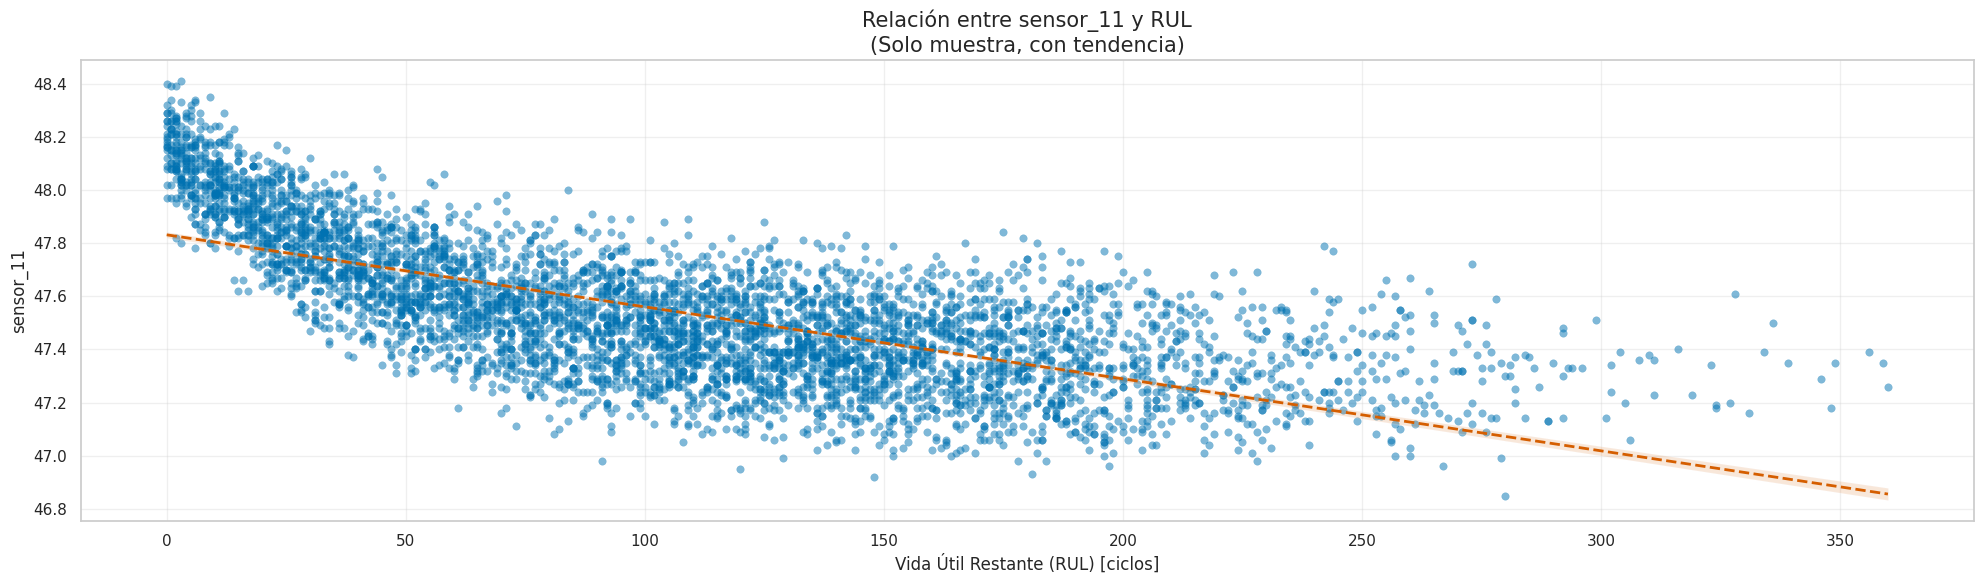

In [33]:
# 11 Visualización clara de la relación entre el sensor más relevante y la RUL

top_sensor = corr_abs_sorted.index[0]
print("Sensor con mayor correlación absoluta con RUL:", top_sensor)

# Muestra aleatoria de puntos (para no sobrecargar el gráfico si hay muchos)
sample_size = 5000
sample_df = train_df[[top_sensor, "RUL"]].sample(
    n=min(sample_size, len(train_df)), random_state=42
)

plt.figure(figsize=(20, 6))
sns.scatterplot(
    data=sample_df,
    x="RUL",
    y=top_sensor,
    alpha=0.5,
    edgecolor=None,
    color="#0072B2",
    s=30,
    linewidth=0.2,
    marker="o",
)
# Línea de tendencia para facilitar la interpretación
sns.regplot(
    data=sample_df,
    x="RUL",
    y=top_sensor,
    scatter=False,
    color="#D55E00",
    line_kws={"lw": 2, "ls": "--"},
)

plt.title(
    f"Relación entre {top_sensor} y RUL\n(Solo muestra, con tendencia)", fontsize=15
)
plt.xlabel("Vida Útil Restante (RUL) [ciclos]", fontsize=12)
plt.ylabel(f"{top_sensor}", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

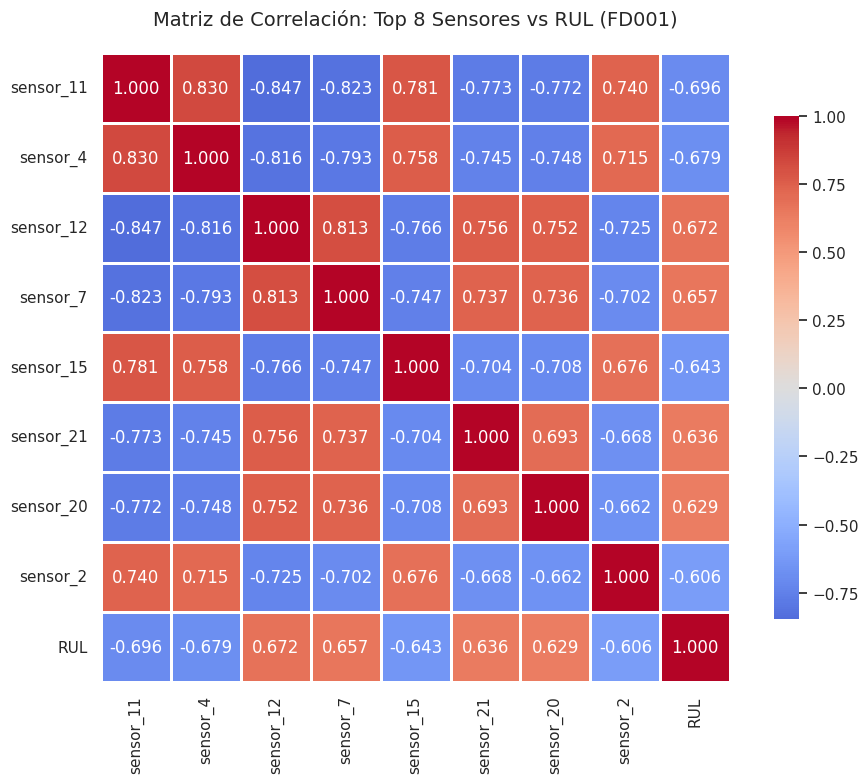

ANÁLISIS DE CORRELACIÓN: SENSORES vs VIDA ÚTIL RESTANTE (RUL)

📊 CORRELACIÓN DE TODOS LOS SENSORES CON RUL (ordenado por relevancia):

--------------------------------------------------------------------------------
Sensor           Correlación   |Correlación| Interpretación                
--------------------------------------------------------------------------------
sensor_11            -0.6962          0.6962 🔴 Muy relevante               
sensor_4             -0.6789          0.6789 🔴 Muy relevante               
sensor_12             0.6720          0.6720 🔴 Muy relevante               
sensor_7              0.6572          0.6572 🔴 Muy relevante               
sensor_15            -0.6427          0.6427 🔴 Muy relevante               
sensor_21             0.6357          0.6357 🔴 Muy relevante               
sensor_20             0.6294          0.6294 🔴 Muy relevante               
sensor_2             -0.6065          0.6065 🔴 Muy relevante               
sensor_17          

In [ ]:
# 12 Matriz de correlación de los sensores más relevantes con RUL

# Seleccionamos los top sensores por correlación absoluta
top_sensors = corr_abs_sorted.index[:8].tolist()

# Creamos una matriz de correlación con estos sensores y RUL
corr_matrix = train_df[top_sensors + ["RUL"]].corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Matriz de Correlación: Top 8 Sensores vs RUL (FD001)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 13 Análisis de correlación entre sensores y falla del motor (RUL)

print("=" * 80)
print("ANÁLISIS DE CORRELACIÓN: SENSORES vs VIDA ÚTIL RESTANTE (RUL)")
print("=" * 80)

# Correlación de todos los sensores con RUL
print("\n📊 CORRELACIÓN DE TODOS LOS SENSORES CON RUL (ordenado por relevancia):\n")
print("-" * 80)
print(
    f"{'Sensor':<15} {'Correlación':>12} {'|Correlación|':>15} {'Interpretación':<30}"
)
print("-" * 80)

for sensor in corr_abs_sorted.index:
    corr_value = corr_with_rul[sensor]
    abs_corr = abs(corr_value)

    # Interpretación de la correlación
    if abs_corr > 0.6:
        interpretacion = "🔴 Muy relevante"
    elif abs_corr > 0.4:
        interpretacion = "🟡 Relevante"
    elif abs_corr > 0.2:
        interpretacion = "🟢 Poco relevante"
    else:
        interpretacion = "⚪ Casi no relevante"

    print(f"{sensor:<15} {corr_value:>12.4f} {abs_corr:>15.4f} {interpretacion:<30}")

print("-" * 80)

# Top sensores más relevantes
print(f"\n🎯 TOP {top_n} SENSORES MÁS RELEVANTES (por correlación absoluta con RUL):\n")
for i, (sensor, valor) in enumerate(top_corr.items(), 1):
    corr_original = corr_with_rul[sensor]
    tendencia = "↓ Decrece" if corr_original < 0 else "↑ Aumenta"
    print(
        f"{i}. {sensor}: |r| = {valor:.4f}  (r = {corr_original:.4f})  {tendencia} cuando RUL→0  ({porcentajes[sensor]:.1f}% del total)"
    )

print("\n" + "=" * 80)
print("CONCLUSIÓN:")
print("=" * 80)
print(
    f"• Los sensores con correlación negativa AUMENTAN su valor cuando el motor se acerca a la falla (RUL→0)"
)
print(
    f"• Los sensores con correlación positiva DISMINUYEN su valor cuando el motor se acerca a la falla (RUL→0)"
)
print(
    f"• Los {top_n} sensores principales explican la degradación del motor de forma significativa"
)
print("=" * 80)